In [1]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

In [3]:
# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
print(os.getcwd())
print(os.listdir())  
print(os.listdir("data"))

d:\ML\Mall-Customers-Segmentation
['.git', '01_Data_Exploration.ipynb', 'data', 'README.md', 'requirements.txt']
['Mall_Customers.csv']


### 2. Load Data Set


In [5]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
print(f"Dataset shape: {df.shape}")
print(f"Number of students: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset shape: (200, 5)
Number of students: 200
Number of features: 5


### 3. Data Overview

In [11]:
print("\n--- Dataset Info ---")
print(df.info())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


### 4. Data Quality Check

In [8]:
print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percent': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df if len(missing_df) > 0 else "No missing values found!")

print("\n--- Duplicate Rows ---")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

print("\n--- Unique Values per Column ---")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


--- Missing Values ---
No missing values found!

--- Duplicate Rows ---
Number of duplicate rows: 0

--- Unique Values per Column ---
CustomerID: 200 unique values
Gender: 2 unique values
Age: 51 unique values
Annual Income (k$): 64 unique values
Spending Score (1-100): 84 unique values


### 5. Univariate Analysis



--- Statistical Summary ---
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

--- Gender Distribution ---
Gender
Female    112
Male       88
Name: count, dtype: int64


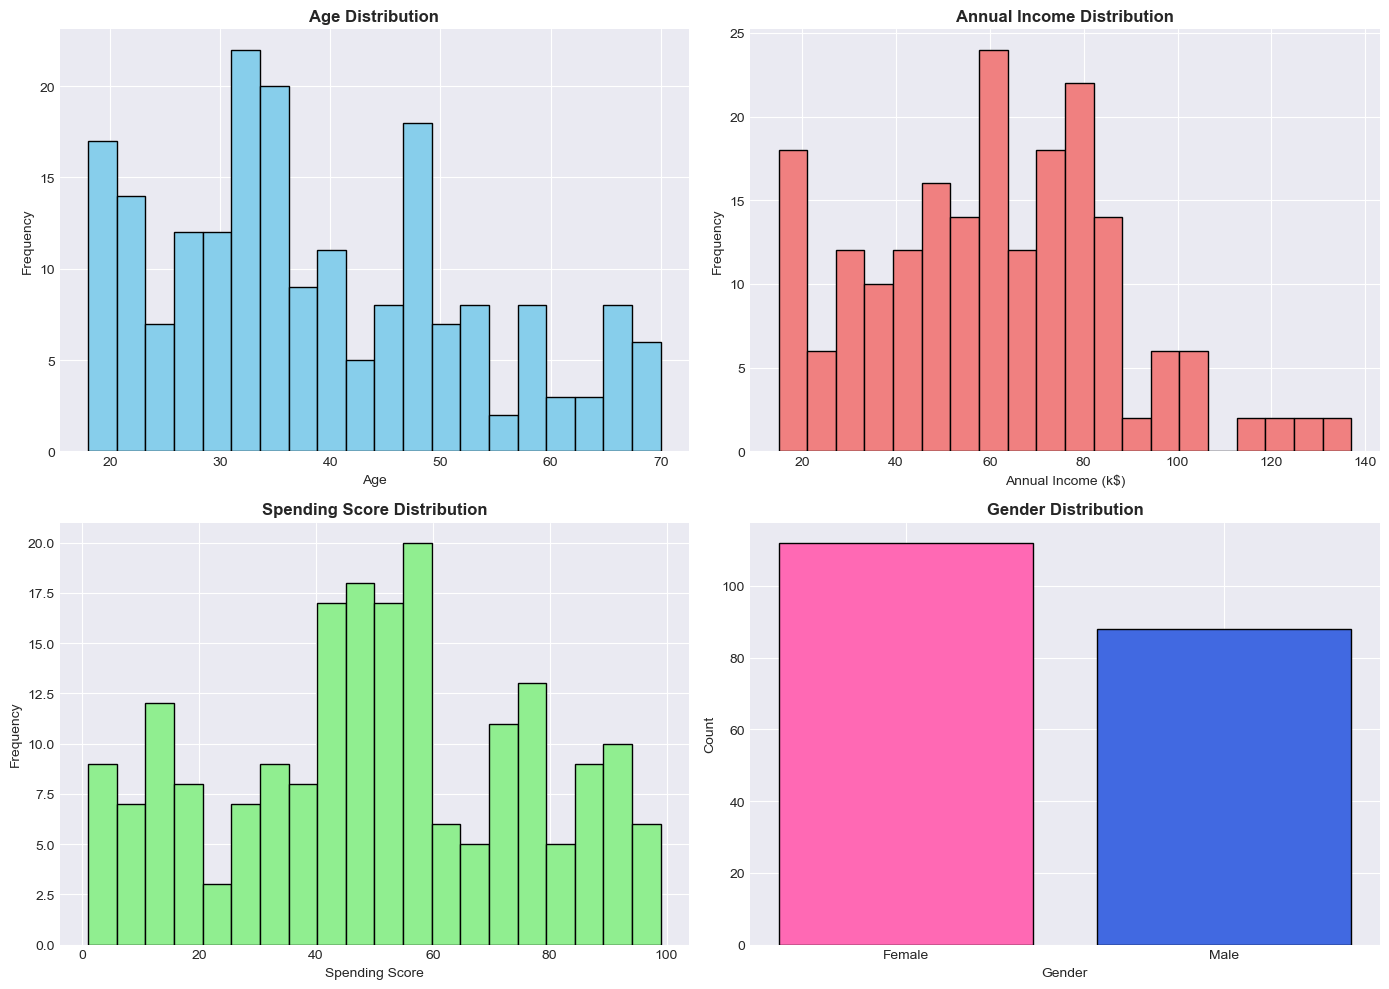

In [12]:
print("\n--- Statistical Summary ---")
print(df.describe())

print("\n--- Gender Distribution ---")
print(df['Gender'].value_counts())

# Visualize each feature
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
axes[0, 0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Income distribution
axes[0, 1].hist(df['Annual Income (k$)'], bins=20, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Annual Income Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')

# Spending Score distribution
axes[1, 0].hist(df['Spending Score (1-100)'], bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Spending Score Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Spending Score')
axes[1, 0].set_ylabel('Frequency')

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[1, 1].bar(gender_counts.index, gender_counts.values, color=['#FF69B4', '#4169E1'], edgecolor='black')
axes[1, 1].set_title('Gender Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### 6. Bivariate Analysis

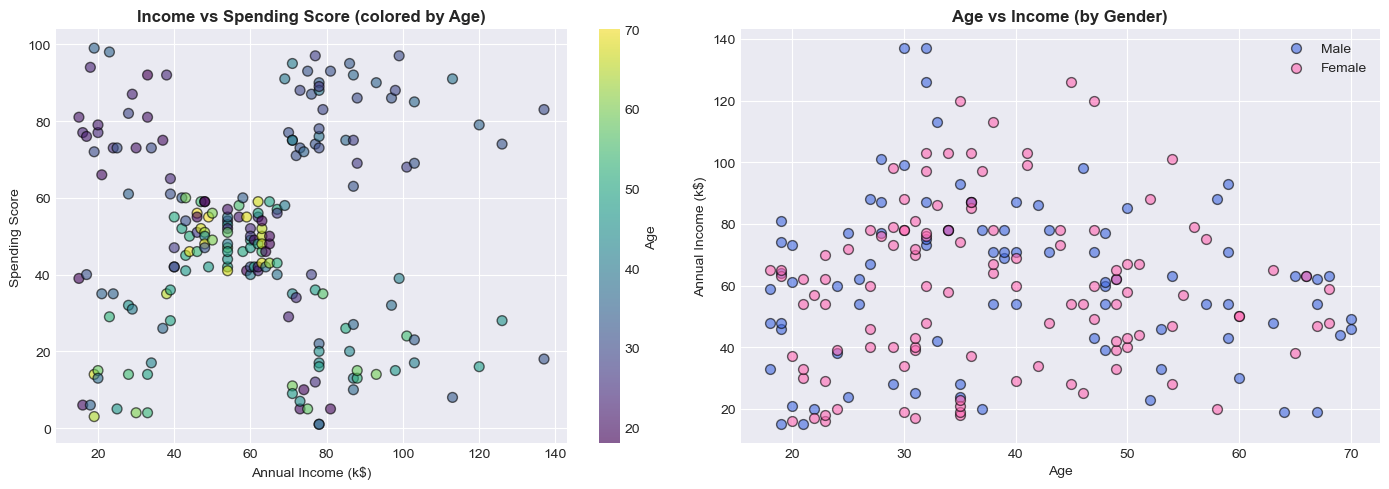

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Income vs Spending Score
axes[0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                alpha=0.6, s=50, c=df['Age'], cmap='viridis', edgecolors='black')
axes[0].set_title('Income vs Spending Score (colored by Age)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score')
plt.colorbar(axes[0].collections[0], ax=axes[0], label='Age')

# Age vs Income (by Gender)
for gender, color in zip(['Male', 'Female'], ['#4169E1', '#FF69B4']):
    mask = df['Gender'] == gender
    axes[1].scatter(df[mask]['Age'], df[mask]['Annual Income (k$)'], 
                    label=gender, alpha=0.6, s=50, color=color, edgecolors='black')
axes[1].set_title('Age vs Income (by Gender)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Annual Income (k$)')
axes[1].legend()

plt.tight_layout()
plt.show()


### 7. Correlation Analysis


Correlation Matrix:
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


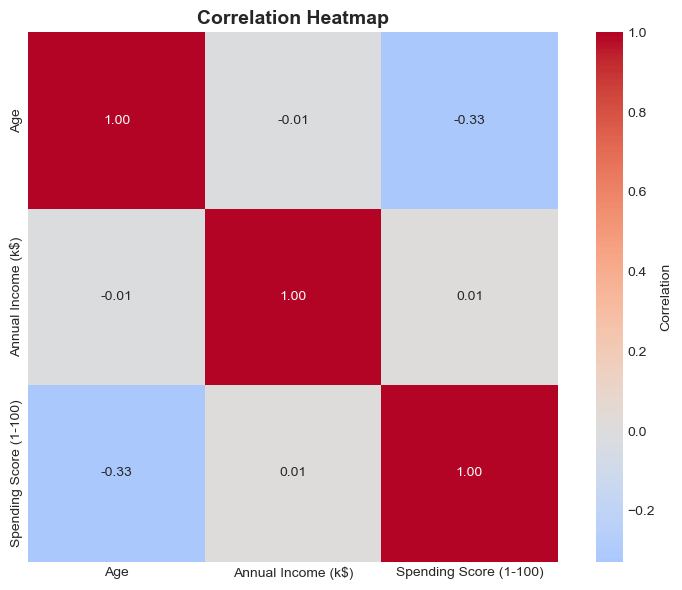

In [14]:
# Numeric columns only
numeric_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
correlation = numeric_df.corr()
print("\nCorrelation Matrix:")
print(correlation)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 8. Gender Analysis


Statistics by Gender:
              Age                   Annual Income (k$)                    \
             mean median        std               mean median        std   
Gender                                                                     
Female  38.098214   35.0  12.644095          59.250000   60.0  26.011952   
Male    39.806818   37.0  15.514812          62.227273   62.5  26.638373   

       Spending Score (1-100)                   
                         mean median       std  
Gender                                          
Female              51.526786   50.0  24.11495  
Male                48.511364   50.0  27.89677  


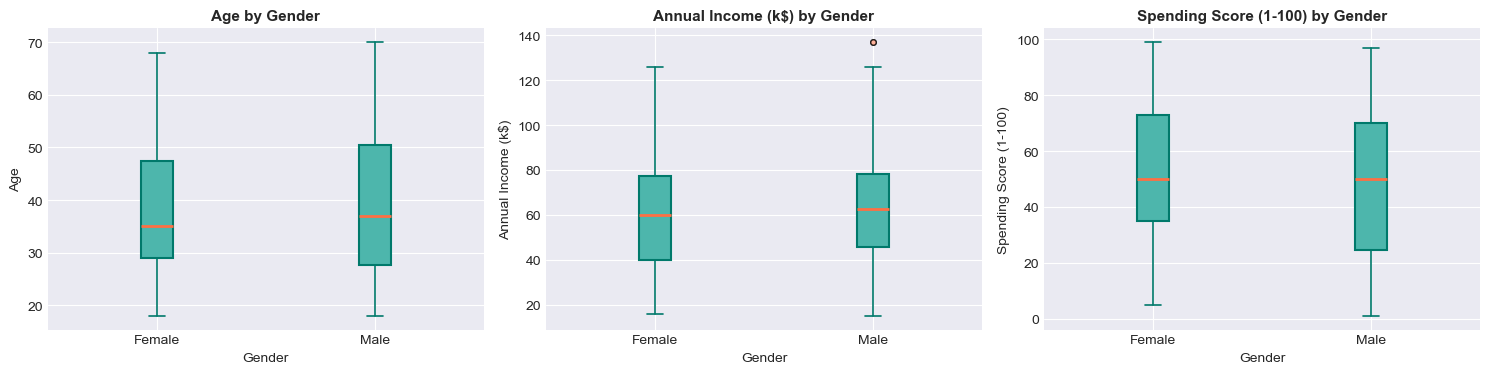

In [20]:
gender_stats = df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'median', 'std'])
print("\nStatistics by Gender:")
print(gender_stats)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    df.boxplot(column=col, by='Gender', ax=axes[idx],
                patch_artist=True,  
                boxprops=dict(facecolor='#4DB6AC', color='#00796B', linewidth=1.5),  
                medianprops=dict(color='#FF7043', linewidth=2),  
                whiskerprops=dict(color='#00796B', linewidth=1.2),
                capprops=dict(color='#00796B', linewidth=1.2),
                flierprops=dict(markerfacecolor='#FFAB91', marker='o', markersize=4, alpha=0.7)
    )
    axes[idx].set_title(f'{col} by Gender', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Gender')
    axes[idx].set_ylabel(col)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['Female', 'Male'])

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

### 9. Key Insights and Summary

In [19]:
print(f"\n✓ Age Range: {df['Age'].min()} - {df['Age'].max()} years")
print(f"✓ Average Age: {df['Age'].mean():.2f} years")

print(f"\n✓ Income Range: ${df['Annual Income (k$)'].min()}k - ${df['Annual Income (k$)'].max()}k")
print(f"✓ Average Income: ${df['Annual Income (k$)'].mean():.2f}k")

print(f"\n✓ Spending Score Range: {df['Spending Score (1-100)'].min()} - {df['Spending Score (1-100)'].max()}")
print(f"✓ Average Spending Score: {df['Spending Score (1-100)'].mean():.2f}")

print(f"\n✓ Gender Split: {(df['Gender']=='Male').sum()} Males, {(df['Gender']=='Female').sum()} Females")

print("\n✓ Key Correlation:")
income_spending_corr = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
print(f"   Income vs Spending Score: {income_spending_corr:.3f} (weak correlation)")
print(f"   → Income and Spending behavior are relatively independent!")

print("\n✓ Data Quality: No missing values, no duplicates - ready for modeling!")

print("\n" + "="*60)
print("NEXT STEP: Prepare data for clustering (scaling + modeling)")
print("="*60)


✓ Age Range: 18 - 70 years
✓ Average Age: 38.85 years

✓ Income Range: $15k - $137k
✓ Average Income: $60.56k

✓ Spending Score Range: 1 - 99
✓ Average Spending Score: 50.20

✓ Gender Split: 88 Males, 112 Females

✓ Key Correlation:
   Income vs Spending Score: 0.010 (weak correlation)
   → Income and Spending behavior are relatively independent!

✓ Data Quality: No missing values, no duplicates - ready for modeling!

NEXT STEP: Prepare data for clustering (scaling + modeling)
